In [1]:
# 1. 라이브러리 로드
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. 데이터 로드
cars_df = pd.read_csv('cars.csv')
brand_df = pd.read_csv('brand.csv')

In [3]:
# 3. cars.csv와 brand.csv 데이터 합치기
# title 변수에서 브랜드 정보를 추출하여 결합할 수 있도록 준비
cars_df['title'] = cars_df['title'].str.lower().str.split().str[0]  # 브랜드명만 추출
brand_df['title'] = brand_df['title'].str.lower()

In [4]:
# 브랜드명 기준으로 데이터 병합
merged_df = pd.merge(cars_df, brand_df, on='title', how='left')

In [5]:
print(merged_df.head(10))

      title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     skoda   6900           70189               2016              3.0   
1  vauxhall   1495           88585               2008              4.0   
2   hyundai    949          137000               2011              NaN   
3      mini   2395           96731               2010              5.0   
4  vauxhall   1000           85000               2013              NaN   
5   hyundai    800          124196               2007              3.0   
6      ford    798          140599               2008              NaN   
7  vauxhall   1995           90000               2009              NaN   
8     volvo    750          225318               2025              NaN   
9   peugeot   1299           87000               2008              5.0   

  Fuel type  Body type Engine    Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L     Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L     Manua

In [37]:
###결측치 처리

In [8]:
from sklearn.preprocessing import LabelEncoder

# 'Engine'과 'Emission Class' 열을 Label Encoding으로 숫자형으로 변환
label_encoder = LabelEncoder()

merged_df['Engine'] = label_encoder.fit_transform(merged_df['Engine'].astype(str))
merged_df['Emission Class'] = label_encoder.fit_transform(merged_df['Emission Class'].astype(str))

In [7]:
# 열마다 결측치 갯수 확인
missing_values = merged_df.isnull().sum()
print(missing_values)

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
country                 0
dtype: int64


In [22]:
# Service history 변수의 결측치를 'Unknown'으로 채우기
merged_df['Service history'].fillna('Unknown', inplace=True)

# 결측치가 5개 이상 포함된 행 제거하기
merged_df = merged_df[merged_df.isnull().sum(axis=1) < 5]

C:\Users\user\AppData\Local\Temp\ipykernel_516\4141397844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Service history'].fillna('Unknown', inplace=True)


In [24]:
missing_values = merged_df.isnull().sum()
print(missing_values)

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                  0
Gearbox                 0
Doors                  25
Seats                  35
Emission Class          0
Service history         0
country                 0
dtype: int64


In [27]:
merged_df['Previous Owners'].fillna('Unknown', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_516\185541579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Previous Owners'].fillna('Unknown', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_516\185541579.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df['Previous Owners'].fillna('Unknown', inplace=True)


In [29]:
missing_values = merged_df.isnull().sum()
print(missing_values)

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine                0
Gearbox               0
Doors                25
Seats                35
Emission Class        0
Service history       0
country               0
dtype: int64


In [31]:
# 결측치가 남아 있는 모든 행 제거
merged_df.dropna(inplace=True)

In [39]:
###Scaler 적용

In [33]:
from sklearn.preprocessing import StandardScaler

# 수치형 변수만 선택하여 Scaler 적용
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# 데이터프레임에 Scaler 적용
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

In [41]:
### PCA 적용

In [45]:
#PC1은 차량의 가격, 주행 거리, 연식과 관련된 정보 요약, 차량 가치와 상태
#PC2는 차량 크기와 유형에 대한 정보 요약, 소형차부터 대형차까지의 유형

In [35]:
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=0.7)  # 설명 분산 비율이 70% 이상이 되도록 설정
principal_components = pca.fit_transform(merged_df[numeric_columns])

# 결과 확인
print(f"선택된 주성분 개수: {pca.n_components_}")
print(f"설명된 분산 비율 (누적): {sum(pca.explained_variance_ratio_):.2f}")

# 주성분 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

선택된 주성분 개수: 2
설명된 분산 비율 (누적): 0.74


In [43]:
# 주성분 로드 값을 데이터프레임으로 변환하여 확인
pca_components_df = pd.DataFrame(pca.components_, columns=numeric_columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_components_df)

        Price  Mileage(miles)  Registration_Year     Doors     Seats
PC1 -0.605632        0.477636          -0.603390 -0.197340 -0.045299
PC2  0.103019       -0.198819           0.010857 -0.667601 -0.709964


In [47]:
#국가별 총 브랜드 개수는?

In [49]:
# 국가별로 그룹화하여 고유한 브랜드(title)의 개수를 계산
country_brand_counts = merged_df.groupby('country')['title'].nunique().reset_index()

# 열 이름 변경: country, brand_count
country_brand_counts.columns = ['country', 'brand_count']

# 결과 확인
print(country_brand_counts)

           country  brand_count
0   Czech Republic            1
1           France            4
2          Germany            6
3            Italy            4
4            Japan           11
5         Malaysia            1
6          Romania            1
7      South Korea            4
8            Spain            1
9           Sweden            2
10  United Kingdom            6
11   United States            5


In [51]:
#상관관계가 높은 변수들이 있는지 확인

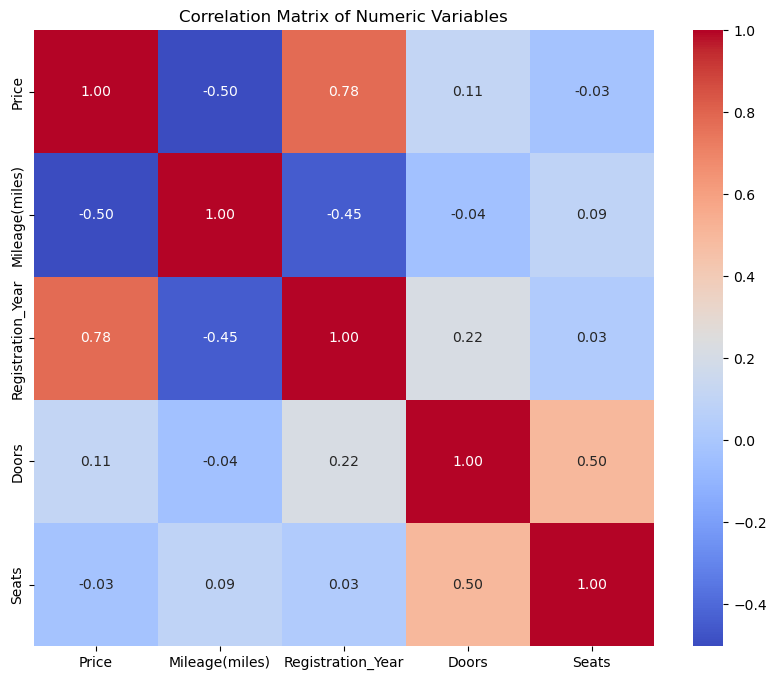

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


# 숫자형 열만 선택
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# 상관관계 행렬 계산
correlation_matrix = numeric_df.corr()

# 상관관계가 높은 변수들을 확인하기 위해 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()